<a href="https://colab.research.google.com/github/Avipsa-Bhujabal/Parkinsons_Disease/blob/main/Parkinsons_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unzip drive/My\ Drive/parkinsons.zip

In [ ]:
#import 
from xgboost import XGBClassifier

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
#boosting algo
from sklearn.ensemble import GradientBoostingClassifier
#!pip install xgboost
import xgboost as xgb
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix,precision_score, recall_score,f1_score, roc_auc_score,accuracy_score
#importing pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import recall_score,make_scorer

In [ ]:
data = pd.read_csv('parkinsons.csv')

In [ ]:
#Understanding and analyzing the data

In [ ]:
data.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [ ]:
#Multicollinearity

<Axes: >

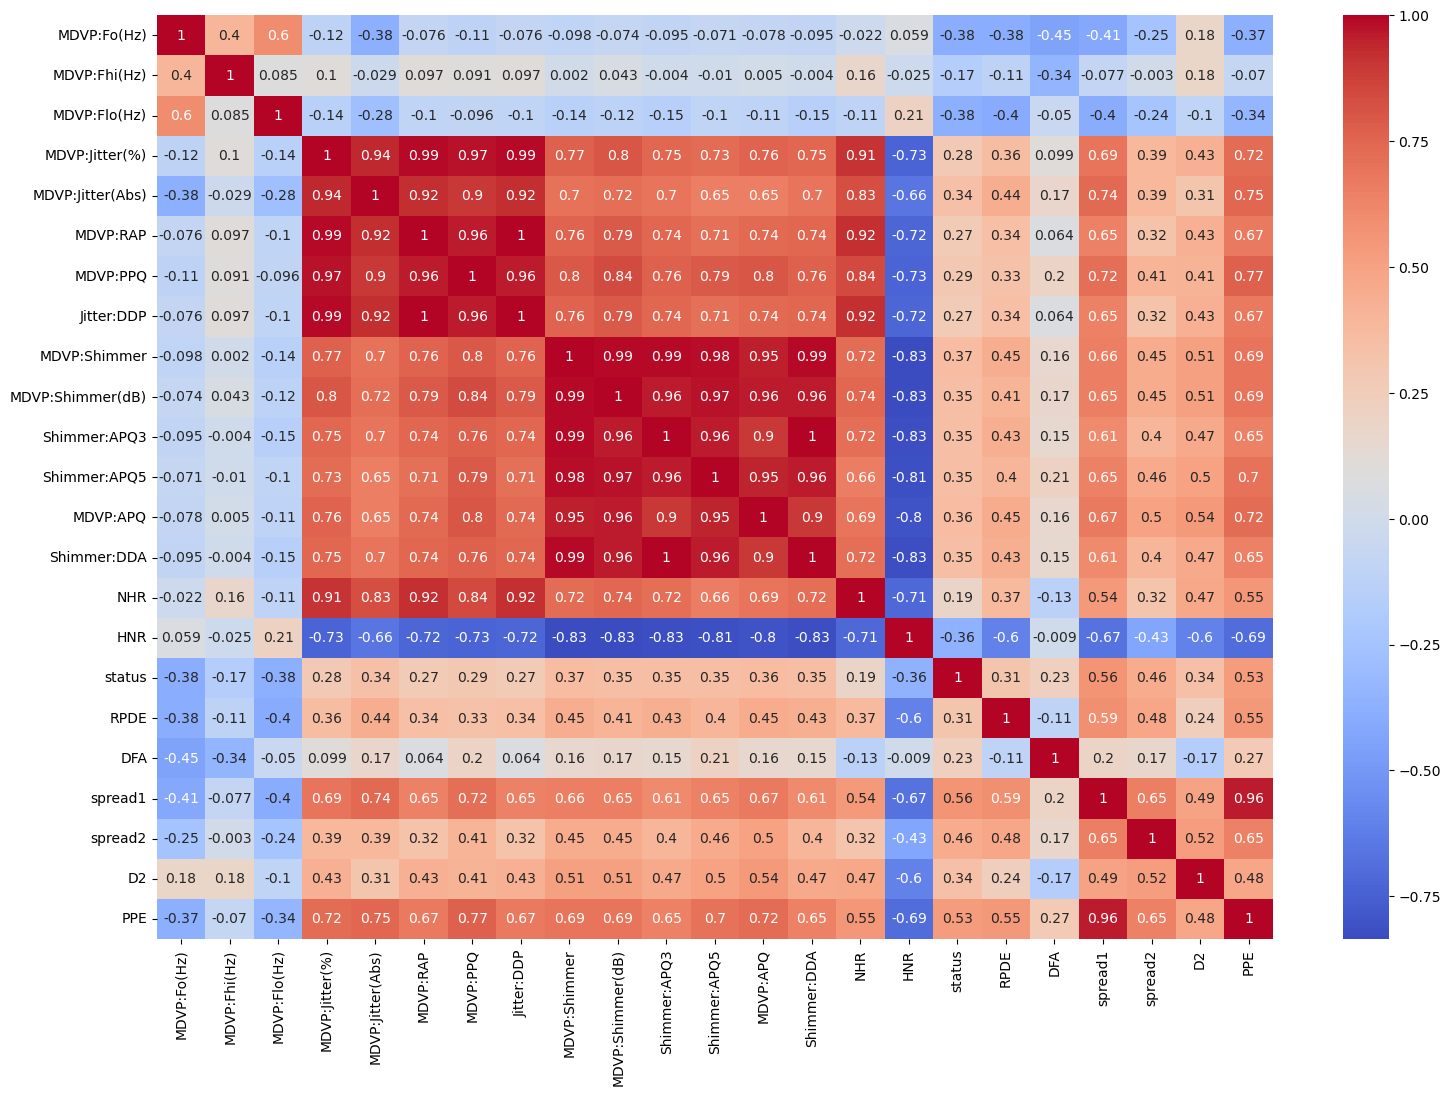

In [ ]:
corr = data.corr(numeric_only = True).round(3)
plt.figure(figsize=(18,12))
sns.heatmap(corr,annot = True, cmap = 'coolwarm')

In [ ]:
##updated
X = data.drop(['name', 'status'], axis=1)
y = data['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

#feature scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# apply PCA on the training set
pca = PCA(0.95)

X_train = pca.fit_transform(X_train)

# apply SMOTE on the transformed training set
smote = SMOTE(random_state=42,sampling_strategy=1)
X_train,y_train = smote.fit_resample(X_train_pca, y_train)
X_test= pca.transform(X_test)


In [ ]:
X_train

array([[-2.76238096, -1.52349817,  1.55772927, ...,  0.39657137,
        -0.29582532, -0.32800601],
       [ 2.77775063,  0.0991573 , -1.99427327, ...,  0.32017792,
        -0.90196345, -0.27236838],
       [ 1.31677315, -1.39833354, -1.62976257, ..., -0.80908681,
         0.21482908, -0.52914939],
       ...,
       [-3.57910485,  3.72173623,  0.91896051, ..., -0.50008152,
        -0.54306024,  0.84277031],
       [-4.67035196,  1.53253684,  1.74174989, ..., -0.4682118 ,
         1.50344358, -0.77097849],
       [-3.75507314,  3.35132277,  0.29463739, ..., -1.36439593,
         0.81655254,  0.29798786]])

In [ ]:
X_test

array([[-2.23959360e+00, -1.03200083e+00, -3.95873748e-01,
         1.30685981e+00,  1.04662775e+00, -5.15059764e-01,
         5.15563808e-01,  7.94810048e-01],
       [-1.46221942e+00, -2.07708070e+00,  1.52199277e+00,
        -7.02425096e-01, -5.43715242e-01,  4.27106181e-01,
         5.58491862e-01, -3.10163309e-01],
       [ 2.51473479e-01, -1.51451845e+00,  2.81870896e-01,
        -1.45658978e+00,  8.23209504e-02,  4.10943733e-01,
         6.95358777e-01, -1.47448092e+00],
       [-1.82669649e+00,  1.50972680e+00,  1.30754119e-01,
        -1.47582296e-01, -1.66390268e+00, -7.09097218e-01,
         3.45588281e-01,  2.47924920e-01],
       [-3.54091862e+00,  2.73579895e+00,  7.70939841e-01,
        -7.71629898e-01, -2.07128680e-01, -5.01377913e-01,
         6.05169109e-02,  6.31951658e-01],
       [ 7.36247425e-01,  6.42109105e-01, -2.06023882e+00,
        -1.34135555e+00, -7.09311616e-01, -7.30266109e-01,
        -1.18378479e-01,  1.33255586e-03],
       [-3.08289351e+00, -1.351686

In [ ]:
#checking for missing values in each column
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
#target variable is status
data['status'].value_counts()
#1 ---> Person has Parkison
#0 ---> Person doesnt have Parkinson

1    147
0     48
Name: status, dtype: int64

In [ ]:
# Split data into features and target
# X = data.drop(['name', 'status'], axis=1)
# y = data['status']
# X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=42)
# #feature scaling
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [ ]:
def generate_model_report(y_actual, y_predicted,algorith):
    
    print("Accuracy = " ,round(accuracy_score(y_actual, y_predicted),4))
    print("Precision = " ,round(precision_score(y_actual, y_predicted),4))
    print("Recall = " ,round(recall_score(y_actual, y_predicted),4))
    print("F1 Score = " ,round(f1_score(y_actual, y_predicted),4))
    
    confm = confusion_matrix(y_actual,y_predicted)
    plt.figure(figsize=(6,6), dpi=80)
    sns.set(font_scale = 1.1)
    ax = sns.heatmap(confm, annot=True, fmt='g',cmap = 'Blues',cbar = False )

    ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
    ax.xaxis.set_ticklabels(['Negative', 'Positive'])

    ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
    ax.yaxis.set_ticklabels(['Negative', 'Positive'])
    
    ax.set_title("Confusion Matrix for "+algorith, fontsize=10, pad=20)

    plt.show()
    pass

In [ ]:
kcv = StratifiedKFold(n_splits=5)

In [ ]:
#logistic regression begins

In [ ]:
logreg_pipeline = make_pipeline(LogisticRegression())

In [ ]:
params = {
  #  'C' : [1],
   'C' : [0.001,0.01,0.1,1,10,100], 
    'solver' : ['liblinear'], #liblinear works well for small dataset and 
    'penalty' : ['l1','l2'],
    'max_iter' : [100,200,300,400]
}
new_params = {'logisticregression__' + key: params[key] for key in params}

grid_logreg = GridSearchCV(logreg_pipeline, param_grid = new_params, cv=kcv, scoring='f1')

grid_logreg.fit(X_train, y_train);

In [ ]:
grid_logreg.best_params_

{'logisticregression__C': 1,
 'logisticregression__max_iter': 100,
 'logisticregression__penalty': 'l1',
 'logisticregression__solver': 'liblinear'}

In [ ]:
grid_logreg.best_score_

0.8548748956581264

In [ ]:
y_test_predictlog = grid_logreg.predict(X_test)
y_train_predict = grid_logreg.predict(X_train)

Accuracy =  0.7692
Precision =  0.9545
Recall =  0.7241
F1 Score =  0.8235


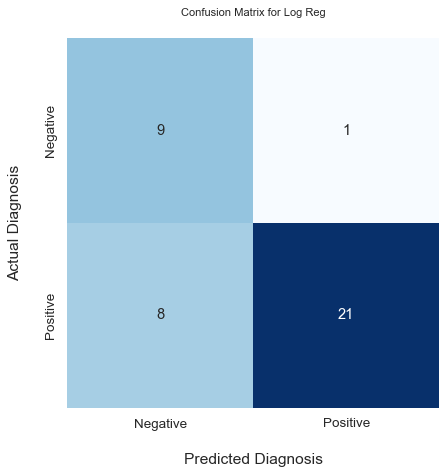

Accuracy =  0.8178
Precision =  0.8505
Recall =  0.7712
F1 Score =  0.8089


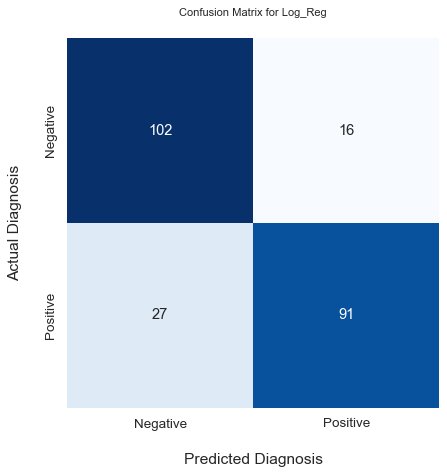

In [ ]:
generate_model_report(y_test,y_test_predictlog,"Log Reg")
generate_model_report(y_train,y_train_predict,"Log_Reg")


#assigning
log_acc = accuracy_score(y_test,y_test_predictlog)
log_f1 = f1_score(y_test,y_test_predictlog)
log_rec = recall_score(y_test, y_test_predictlog)
log_prec = precision_score(y_test, y_test_predictlog)

In [ ]:
#Gaussian NB begins

In [ ]:
gnb_pipeline = make_pipeline(GaussianNB())

In [ ]:
params = {
    'var_smoothing' : np.logspace(0,-9,num=100)
}
new_params = {'gaussiannb__' + key: params[key] for key in params}

grid_gnb = GridSearchCV(gnb_pipeline, param_grid = new_params, cv=kcv, scoring='f1')

grid_gnb.fit(X_train, y_train);

In [ ]:
grid_gnb.best_params_

{'gaussiannb__var_smoothing': 0.002848035868435802}

In [ ]:
grid_gnb.best_score_

0.8010430839002268

In [ ]:
y_test_predictgnb = grid_gnb.predict(X_test)
y_train_predict = grid_gnb.predict(X_train)

Accuracy =  0.7179
Precision =  0.875
Recall =  0.7241
F1 Score =  0.7925


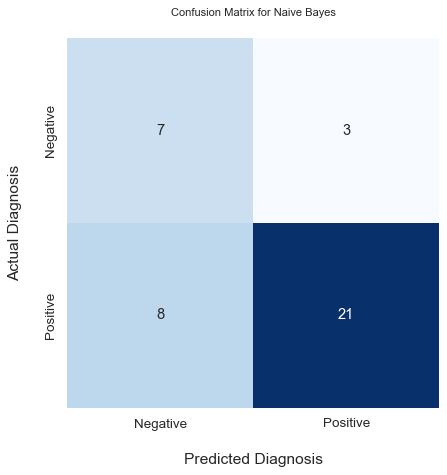

Accuracy =  0.8178
Precision =  0.8505
Recall =  0.7712
F1 Score =  0.8089


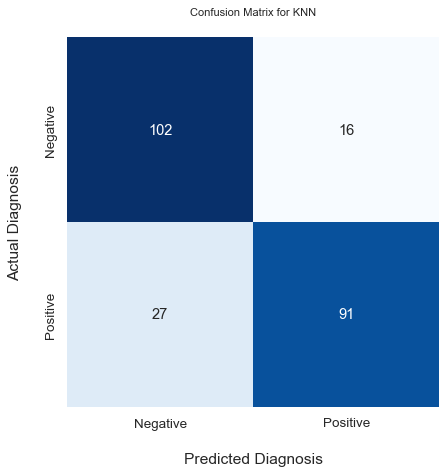

In [ ]:
generate_model_report(y_test,y_test_predictgnb,"Naive Bayes")
generate_model_report(y_train,y_train_predict,"KNN")

#assigning
gnb_acc = accuracy_score(y_test,y_test_predictgnb)
gnb_f1 = f1_score(y_test,y_test_predictgnb)
gnb_rec = recall_score(y_test, y_test_predictgnb)
gnb_prec = precision_score(y_test, y_test_predictgnb)

In [ ]:
#Gaussian NB ends

In [ ]:
#KNN
knn_pipeline = make_pipeline(MinMaxScaler(),KNeighborsClassifier())

In [ ]:
params = {
    'n_neighbors' : [3,5,7,9]
}
kcv = StratifiedKFold(n_splits=5)
new_params = {'kneighborsclassifier__' + key: params[key] for key in params}

grid_knn = GridSearchCV(knn_pipeline, param_grid = new_params, cv=kcv, scoring='f1')
grid_knn.fit(X_train, y_train);

In [ ]:
grid_knn.best_params_

{'kneighborsclassifier__n_neighbors': 3}

In [ ]:
grid_knn.best_score_

0.8995918367346938

In [ ]:
y_test_predictknn = grid_knn.predict(X_test)
y_train_predict = grid_knn.predict(X_train)

Accuracy =  0.8205
Precision =  0.9583
Recall =  0.7931
F1 Score =  0.8679


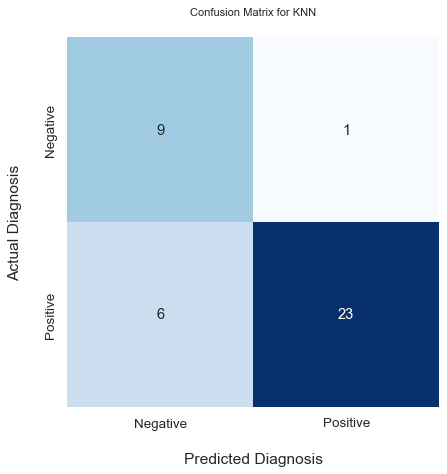

Accuracy =  0.9534
Precision =  1.0
Recall =  0.9068
F1 Score =  0.9511


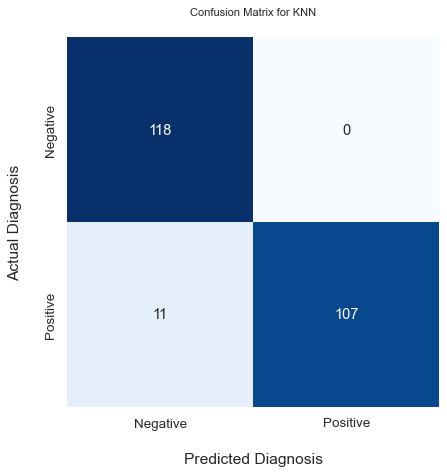

In [ ]:
generate_model_report(y_test,y_test_predictknn,"KNN")
generate_model_report(y_train,y_train_predict,"KNN")

#assigning
knn_acc = accuracy_score(y_test,y_test_predictknn)
knn_f1 = f1_score(y_test,y_test_predictknn)
knn_rec = recall_score(y_test, y_test_predictknn)
knn_prec = precision_score(y_test, y_test_predictknn)

In [ ]:
#knn end

In [ ]:
#svm begins sklearn.svm.SVC

In [ ]:
svm_pipeline = make_pipeline(MinMaxScaler(),SVC())

In [ ]:
params = {
    'C': [0.1,1,10], 
    'gamma': [1,0.1,0.01,0.001],
    'kernel' : ['linear','rbf'],
    'random_state' : [22]
}
kcv = StratifiedKFold(n_splits=5)
new_params = {'svc__' + key: params[key] for key in params}

grid_svm = GridSearchCV(svm_pipeline, param_grid = new_params, cv= kcv, scoring='f1')
grid_svm.fit(X_train, y_train);

In [ ]:
grid_svm.best_params_

{'svc__C': 10, 'svc__gamma': 1, 'svc__kernel': 'rbf', 'svc__random_state': 22}

In [ ]:
grid_svm.best_score_

0.9021268586485979

In [ ]:
y_test_predictsvm = grid_svm.predict(X_test)

Accuracy =  0.8462
Precision =  0.96
Recall =  0.8276
F1 Score =  0.8889


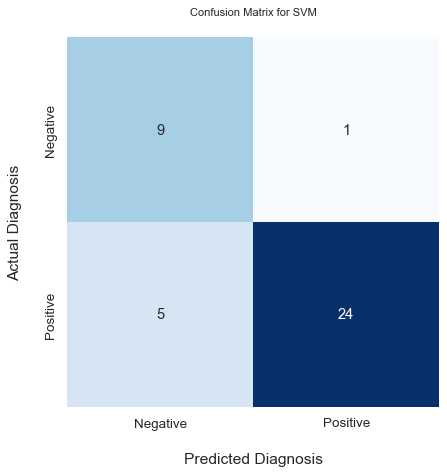

In [ ]:
generate_model_report(y_test,y_test_predictsvm,"SVM")

#assigning
svm_acc = accuracy_score(y_test,y_test_predictsvm)
svm_f1 = f1_score(y_test,y_test_predictsvm)
svm_rec = recall_score(y_test, y_test_predictsvm)
svm_prec = precision_score(y_test, y_test_predictsvm)

In [ ]:
#svm ends

In [ ]:
#Decision Tree Begins
#sklearn.tree.DecisionTreeClassifier

In [ ]:
dec_pipeline = make_pipeline(MinMaxScaler(),DecisionTreeClassifier())

In [ ]:
params = {
     'criterion': ['gini','entropy'],
    'max_depth': [4,6,8,10],
    'random_state': [13]
}
cv = StratifiedKFold(n_splits=10)
new_params = {'decisiontreeclassifier__' + key: params[key] for key in params}

grid_dec = GridSearchCV(dec_pipeline, param_grid = new_params, cv= 5, scoring = 'f1')
grid_dec.fit(X_train, y_train);

In [ ]:
grid_dec.best_params_

{'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 6,
 'decisiontreeclassifier__random_state': 13}

In [ ]:
grid_dec.best_score_

0.924509404872032

In [ ]:
y_test_predictdec = grid_dec.predict(X_test)
y_train_predictdec = grid_dec.predict(X_train)

Accuracy =  0.8974
Precision =  1.0
Recall =  0.8621
F1 Score =  0.9259


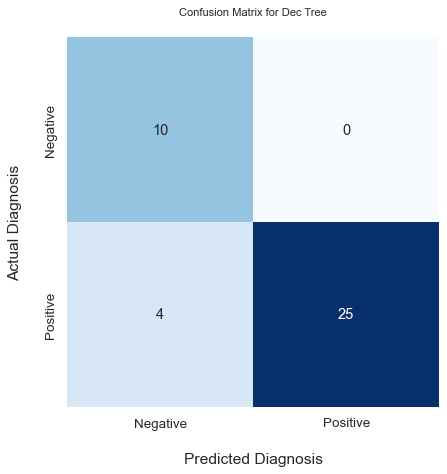

Accuracy =  0.9831
Precision =  1.0
Recall =  0.9661
F1 Score =  0.9828


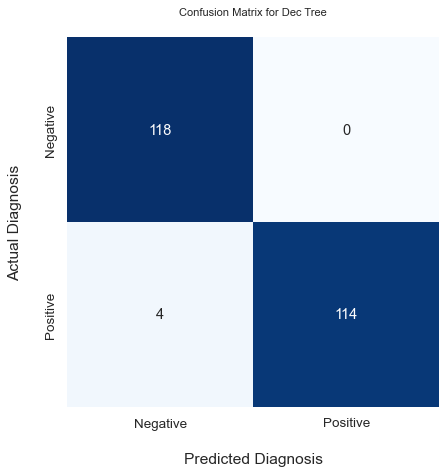

In [ ]:
generate_model_report(y_test,y_test_predictdec,"Dec Tree")
generate_model_report(y_train,y_train_predictdec,"Dec Tree")


#assigning

dectree_acc = accuracy_score(y_test,y_test_predictdec)
dectree_f1 = f1_score(y_test,y_test_predictdec)
dectree_rec = recall_score(y_test, y_test_predictdec)
dectree_prec = precision_score(y_test, y_test_predictdec)

In [ ]:
#Decision tree Ends

In [ ]:
#Random Forest Begins

In [ ]:
kcv = StratifiedKFold(n_splits=5)
imba_pipeline = make_pipeline(RandomForestClassifier())
#cross_val_score(imba_pipeline, X_train, y_train, scoring='accuracy', cv=cv)

In [ ]:
params = {
     'criterion': ['gini','entropy'],
    'n_estimators': [50, 100,150,200],
    'max_depth': [4, 6],
    'random_state': [22]
}
cv = StratifiedKFold(n_splits=10)
new_params = {'randomforestclassifier__' + key: params[key] for key in params}
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kcv, scoring='f1',
                        return_train_score=True)
grid_imba.fit(X_train, y_train);

In [ ]:
grid_imba.best_params_

{'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': 6,
 'randomforestclassifier__n_estimators': 200,
 'randomforestclassifier__random_state': 22}

In [ ]:
grid_imba.best_score_

0.9570361337706389

In [ ]:
y_test_predictrf = grid_imba.predict(X_test)
y_train_predictrf = grid_imba.predict(X_train)

Accuracy =  0.9487
Precision =  1.0
Recall =  0.931
F1 Score =  0.9643


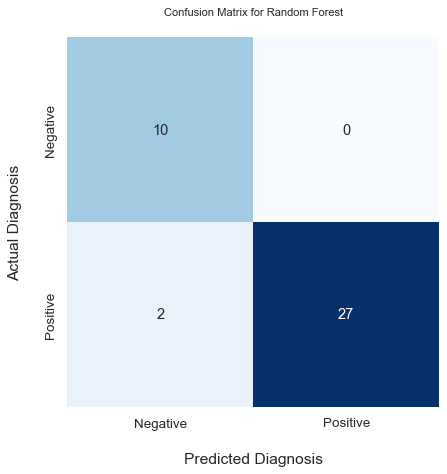

Accuracy =  1.0
Precision =  1.0
Recall =  1.0
F1 Score =  1.0


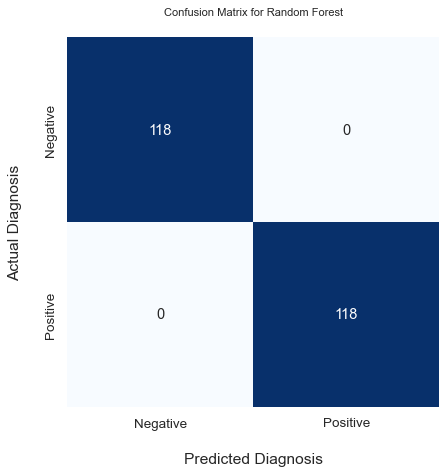

In [ ]:
generate_model_report(y_test,y_test_predictrf,"Random Forest")
generate_model_report(y_train,y_train_predictrf,"Random Forest")


#assigning
rf_acc = accuracy_score(y_test,y_test_predictrf)
rf_f1 = f1_score(y_test,y_test_predictrf)
rf_rec = recall_score(y_test, y_test_predictrf)
rf_prec = precision_score(y_test, y_test_predictrf)

In [ ]:
#Random Forest ends

In [ ]:
# Train and evaluate K-Nearest Neighbors classifier
# knn = KNeighborsClassifier(n_neighbors=4)
# knn.fit(X_train, y_train)
# knn_pred = knn.predict(X_test)
# knn_acc = round(accuracy_score(y_test, knn_pred),4)
# knn_cm = confusion_matrix(y_test, knn_pred)

# knn_train_pred = knn.predict(X_train)
# knn_training_data_acc= accuracy_score(y_train,knn_train_pred)
# print(knn_training_data_acc)
# print(knn_acc)

In [ ]:
# xgb_classifier = xgb.XGBClassifier(base_score = 0.5,max_bin=256,learning_rate=0.0064,max_depth=6,min_child_weight=1,n_estimators=100)
# xgb_classifier.fit(x_train_res, y_train_res)

# xgb_pred = xgb_classifier.predict(X_test)
# xgb_acc = round(accuracy_score(y_test, xgb_pred),4)
# xgb_cm = confusion_matrix(y_test, xgb_pred)

# #xgb_train_pred = xgb_classifier.predict(x_train_res)
# #xgb_training_data_acc= round(accuracy_score(y_train_res,xgb_train_pred),4)
# #print(xgb_training_data_acc)
# #print(xgb_acc)

# #xgb_cm = confusion_matrix(y_test, xgb_pred)

In [ ]:

# search_space = {
#     "n_estimators": [100,200,500],
#     "max_depth": [3,6,9],
#     "gamma" : [0.01,0.1],
#     "learning_rate" : [0.001,0.01,0.1,1]
# }

In [ ]:
# input_data = (17.99200,57.30200,5.99700,0.00784,0.00007,3.370,0.00554,0.01109,0.04374,0.42600,0.02182,0.03130,0.02971,0.06545,0.02211,21.03300,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
# )
# nparr = np.asarray(input_data)
# input_data_reshaped =  nparr.reshape(1,-1)

# std_data = scaler.transform(input_data_reshaped)
# prediction = svm.predict(std_data)
# #print(prediction)

# if(prediction[0] == 0):
#     print("The person doesnt have Parkinsons Disease")
# else:
#     print("The person has Parkinsons Disease")

In [ ]:
## ADABOOST USING SVC LOGREG AND DECTREE

In [ ]:
#logreg

In [ ]:
logreg = LogisticRegression()
ada_pipeline = make_pipeline(SMOTE(sampling_strategy = 1,random_state=13), AdaBoostClassifier(estimator = logreg))


In [ ]:
scoring1 = {
    'f1': make_scorer(f1_score),
    'recall': make_scorer(recall_score, pos_label=0)
}
params = {
    'n_estimators': [50,100, 150,200,250,350],
    'learning_rate': [0.001,0.01, 0.1,0.3,1],
    'random_state': [22]
}

new_params = {'adaboostclassifier__' + key: params[key] for key in params}
grid_ada = GridSearchCV(ada_pipeline, param_grid = new_params, cv= kcv,scoring=scoring1, refit = 'f1')
grid_ada.fit(X_train, y_train);

In [ ]:
grid_ada.best_params_

{'adaboostclassifier__learning_rate': 0.1,
 'adaboostclassifier__n_estimators': 250,
 'adaboostclassifier__random_state': 22}

In [ ]:
grid_ada.best_score_

0.8598828245451742

In [ ]:
y_test_predictada = grid_ada.predict(X_test)

Accuracy =  0.8205128205128205
Precision =  0.8787878787878788
Recall =  0.90625
F1 Score =  0.8923076923076922


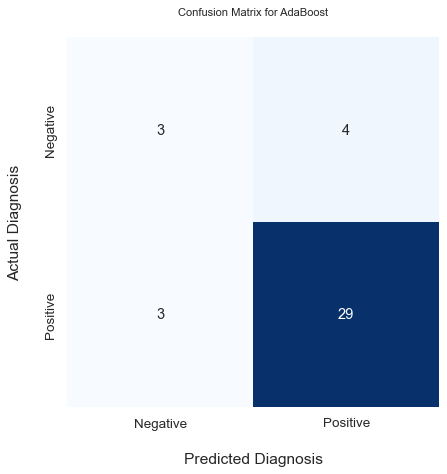

In [ ]:
generate_model_report(y_test,y_test_predictada,"AdaBoost")

In [ ]:
#Adaboost using nb

In [ ]:
nb = GaussianNB()
ada_pipeline = make_pipeline(AdaBoostClassifier(estimator = nb))

In [ ]:
scoring1 = {
    'f1': make_scorer(f1_score),
    'recall': make_scorer(recall_score, pos_label=0)
}
params = {
    'n_estimators': [50,100, 150,200,250,350],
    'learning_rate': [0.001,0.01, 0.1,0.3,1],
    'random_state': [22]
}

new_params = {'adaboostclassifier__' + key: params[key] for key in params}
grid_ada = GridSearchCV(ada_pipeline, param_grid = new_params, cv= kcv,scoring=scoring1, refit = 'f1')
grid_ada.fit(X_train, y_train);

In [ ]:
grid_ada.best_params_

{'adaboostclassifier__learning_rate': 0.1,
 'adaboostclassifier__n_estimators': 150,
 'adaboostclassifier__random_state': 22}

In [ ]:
grid_ada.best_score_

0.890475813140766

In [ ]:
y_test_predictada = grid_ada.predict(X_test)

Accuracy =  0.7949
Precision =  0.92
Recall =  0.7931
F1 Score =  0.8519


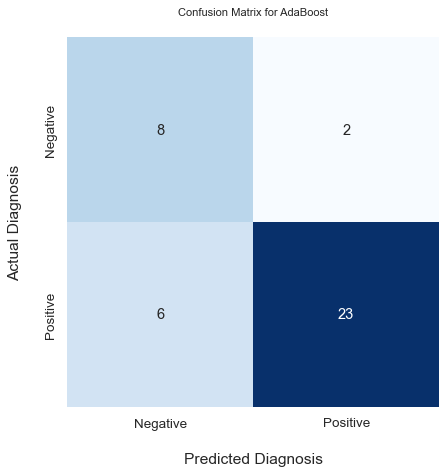

In [ ]:
generate_model_report(y_test,y_test_predictada,"AdaBoost")

In [ ]:
#Adaboost using dectree (normal)

In [ ]:
ada_pipeline = make_pipeline(SMOTE(sampling_strategy = 1,random_state=13), AdaBoostClassifier())

In [ ]:
scoring1 = {
    'f1': make_scorer(f1_score),
    'recall': make_scorer(recall_score, pos_label=0)
}
params = {
    'n_estimators': [50,100, 150,200,250,350],
    'learning_rate': [0.001,0.01, 0.1,0.3,1],
    'random_state': [22]
}

new_params = {'adaboostclassifier__' + key: params[key] for key in params}
grid_ada = GridSearchCV(ada_pipeline, param_grid = new_params, cv= kcv,scoring=scoring1, refit = 'f1')
grid_ada.fit(X_train, y_train);


In [ ]:
grid_ada.best_params_

{'adaboostclassifier__learning_rate': 0.1,
 'adaboostclassifier__n_estimators': 350,
 'adaboostclassifier__random_state': 22}

In [ ]:
grid_ada.best_score_

0.9288067224315959

In [ ]:
y_test_predictada = grid_ada.predict(X_test)

Accuracy =  0.8461538461538461
Precision =  0.90625
Recall =  0.90625
F1 Score =  0.90625


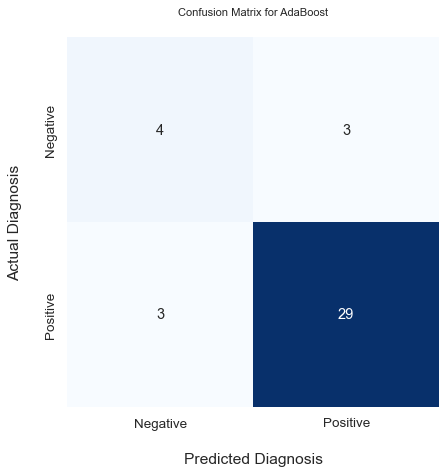

In [ ]:
generate_model_report(y_test,y_test_predictada,"AdaBoost")

In [ ]:
#assigning
ada_acc = accuracy_score(y_test,y_test_predictada)
ada_f1 = f1_score(y_test,y_test_predictada)
ada_rec = recall_score(y_test, y_test_predictada)
ada_prec = precision_score(y_test, y_test_predictada)

In [ ]:
#Ada Boost ends

In [ ]:
#(base_score=0.5,
#max_bin=256,learning_rate=0.300000012,max_depth=6,mi
#n_child_weight=1,n_estimators=100)

In [ ]:
#XPboost begins
#classifier = xgboost.XGBClassifier()
xgb_pipeline = make_pipeline(SMOTE(sampling_strategy = 1,random_state=13), XGBClassifier())

In [ ]:
params = {
    'n_estimators': [50,100, 150,200,250,350],
    'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30],
    'min_child_weight' : [1,3,5,7],
    'max_depth' : [3,4,5,6,7,8,10,12],
    'random_state': [22]
}
kcv = StratifiedKFold(n_splits=5)
new_params = {'xgbclassifier__' + key: params[key] for key in params}

grid_svm = RandomizedSearchCV(xgb_pipeline,param_distributions = new_params,cv= kcv,n_jobs=-1,scoring='f1')
grid_svm.fit(X_train, y_train);

In [ ]:
grid_svm.best_params_

{'xgbclassifier__random_state': 22,
 'xgbclassifier__n_estimators': 100,
 'xgbclassifier__min_child_weight': 1,
 'xgbclassifier__max_depth': 3,
 'xgbclassifier__learning_rate': 0.05}

In [ ]:
grid_svm.best_score_

0.9475442983517517

In [ ]:
y_test_predictxgb = grid_svm.predict(X_test)

Accuracy =  0.9487179487179487
Precision =  0.9411764705882353
Recall =  1.0
F1 Score =  0.9696969696969697


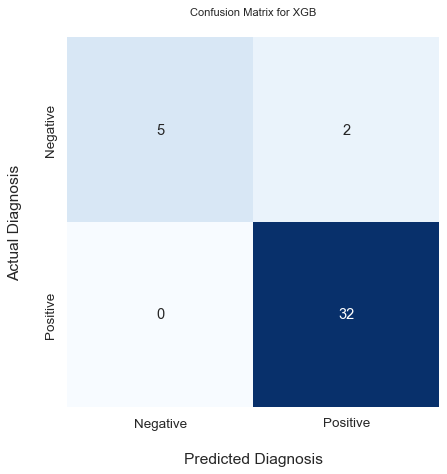

In [ ]:
generate_model_report(y_test,y_test_predictxgb,"XGB")

In [ ]:
xgb_acc = accuracy_score(y_test,y_test_predictxgb)
xgb_f1 = f1_score(y_test,y_test_predictxgb)
xgb_rec = recall_score(y_test, y_test_predictxgb)
xgb_prec = precision_score(y_test, y_test_predictxgb)

In [ ]:
#XP Boost algo ends

In [ ]:
##end

In [ ]:
#(base_score=0.5,
#max_bin=256,learning_rate=0.300000012,max_depth=6,mi
#n_child_weight=1,n_estimators=100)


In [ ]:
xgb_pipeline = make_pipeline(SMOTE(sampling_strategy = 1,random_state=13), RandomForestClassifier())

Accuracy =  0.9743589743589743
Precision =  0.9696969696969697
Recall =  1.0
F1 Score =  0.9846153846153847


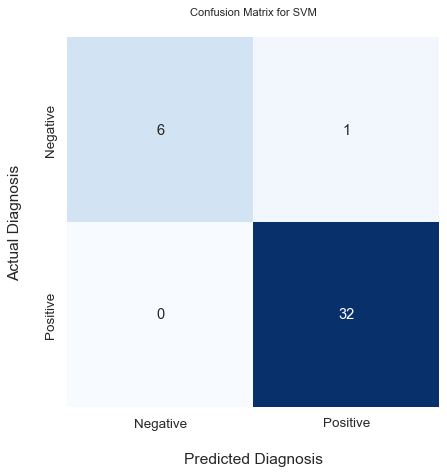

In [ ]:
params = {
    'C': [0.1,1,10], 
    'gamma': [1,0.1,0.01,0.001],
    'kernel' : ['linear','rbf'],
    'random_state' : [22]
}

new_params = {'svc__' + key: params[key] for key in params}

grid_svm = GridSearchCV(svm_pipeline, param_grid = new_params, cv= kcv, scoring='f1')
grid_svm.fit(X_train, y_train);
grid_svm.best_params_
grid_svm.best_score_
y_test_predict = grid_svm.predict(X_test)
generate_model_report(y_test,y_test_predict,"SVM")

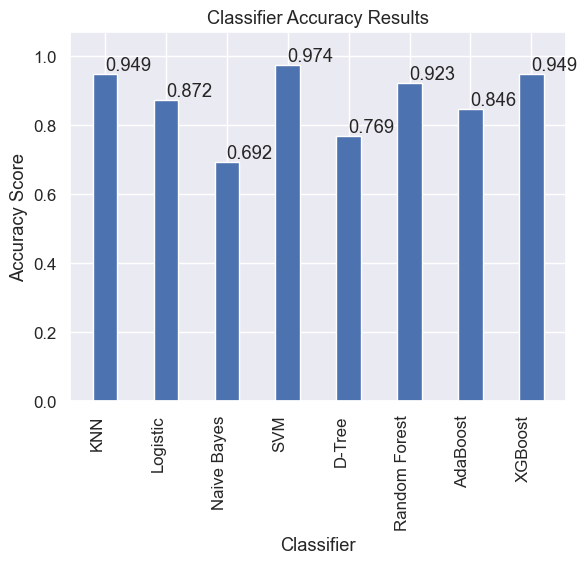

In [ ]:
# Plot accuracy results
classifiers = ['KNN', 'Logistic', 'Naive Bayes', 'SVM','D-Tree','Random Forest','AdaBoost','XGBoost']
accuracy_scores = [round(knn_acc,3), round(log_acc,3), round(gnb_acc,3), round(svm_acc,3),round(dectree_acc,3),round(rf_acc,3),round(ada_acc,3),round(xgb_acc,3)]
plt.bar(classifiers ,accuracy_scores,width = 0.4)
plt.title('Classifier Accuracy Results')
plt.xticks(rotation= 90, ha='right')
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1.07)
for index,data in enumerate(accuracy_scores):
    plt.text(x = index, y = data + 0.01 , s = f"{data}")
plt.show()

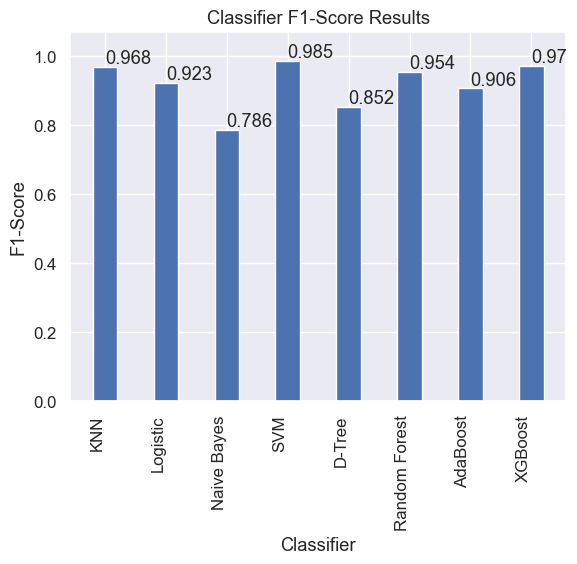

In [ ]:
#Plot F1-Score
classifiers = ['KNN', 'Logistic', 'Naive Bayes', 'SVM','D-Tree','Random Forest','AdaBoost','XGBoost']
f1_scores = [round(knn_f1,3), round(log_f1,3), round(gnb_f1,3), round(svm_f1,3),round(dectree_f1,3),round(rf_f1,3),round(ada_f1,3),round(xgb_f1,3)]
plt.bar(classifiers , f1_scores,width = 0.4)
plt.title('Classifier F1-Score Results')
plt.xticks(rotation= 90, ha='right')
plt.xlabel('Classifier')
plt.ylabel('F1-Score')
plt.ylim(0, 1.07)
for index,data in enumerate(f1_scores):
    plt.text(x = index, y = data+ 0.01 , s = f"{data}")
plt.show()

NameError: name 'tree' is not defined

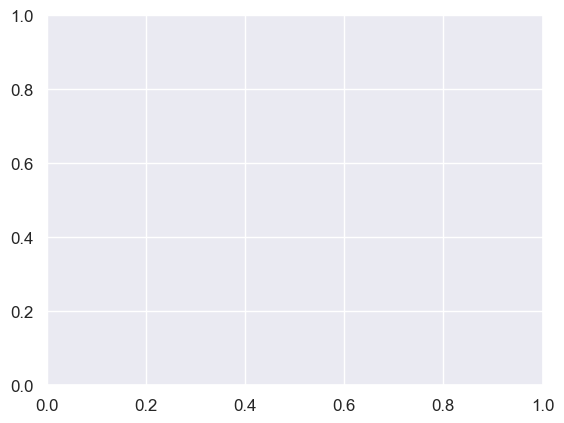

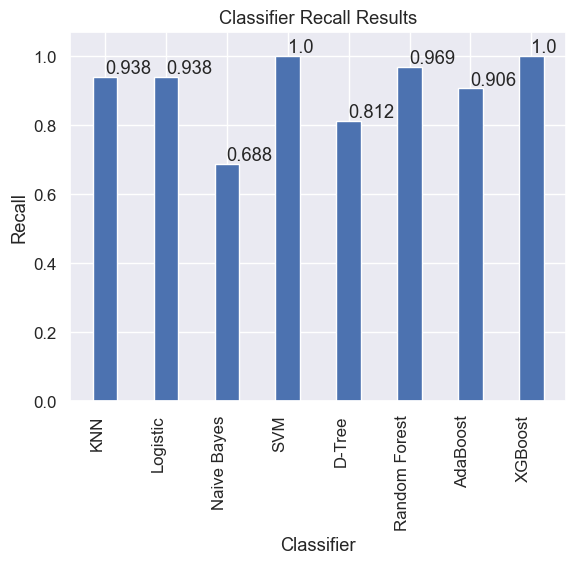

In [ ]:
#Plot Recall
classifiers = ['KNN', 'Logistic', 'Naive Bayes', 'SVM','D-Tree','Random Forest','AdaBoost','XGBoost']
recall_scores = [round(knn_rec,3), round(log_rec,3), round(gnb_rec,3), round(svm_rec,3),round(dectree_rec,3),round(rf_rec,3),round(ada_rec,3),round(xgb_rec,3)]
plt.bar(classifiers , recall_scores,width = 0.4)
plt.title('Classifier Recall Results')
plt.xticks(rotation= 90, ha='right')
plt.xlabel('Classifier')
plt.ylabel('Recall')
plt.ylim(0, 1.07)
for index,data in enumerate(recall_scores):
    plt.text(x = index, y = data+ 0.01 , s = f"{data}")
plt.show()

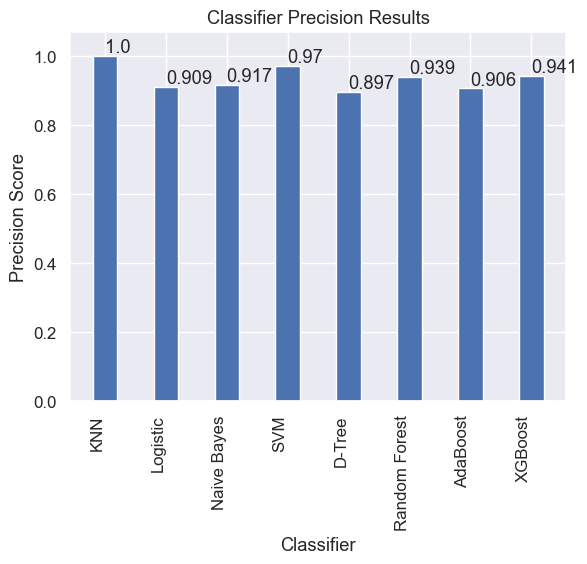

In [ ]:
#Plot Precision
classifiers = ['KNN', 'Logistic', 'Naive Bayes', 'SVM','D-Tree','Random Forest','AdaBoost','XGBoost']
prec_scores = [round(knn_prec,3), round(log_prec,3), round(gnb_prec,3), round(svm_prec,3),round(dectree_prec,3),round(rf_prec,3),round(ada_prec,3),round(xgb_prec,3)]
plt.bar(classifiers , prec_scores,width = 0.4)
plt.title('Classifier Precision Results')
plt.xticks(rotation= 90, ha='right')
plt.xlabel('Classifier')
plt.ylabel('Precision Score')
plt.ylim(0, 1.07)
for index,data in enumerate(prec_scores):
    plt.text(x = index, y = data+ 0.01 , s = f"{data}")
plt.show()